<h1><center>Day 31


<h1><center>Fishion Mnist in Tensorflow

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [19]:
fmnist = keras.datasets.fashion_mnist

In [20]:
(X_train,y_train),(X_test,y_test)=fmnist.load_data()
assert X_train.shape == ( 60000 , 28 , 28 )
assert X_test.shape == (10000 ,28 ,28 )
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)



In [21]:
print('train X=%s, y=%s'% (X_train.shape, y_train.shape))
print('train X=%s, y=%s'% (X_test.shape, y_test.shape))

train X=(60000, 28, 28), y=(60000,)
train X=(10000, 28, 28), y=(10000,)


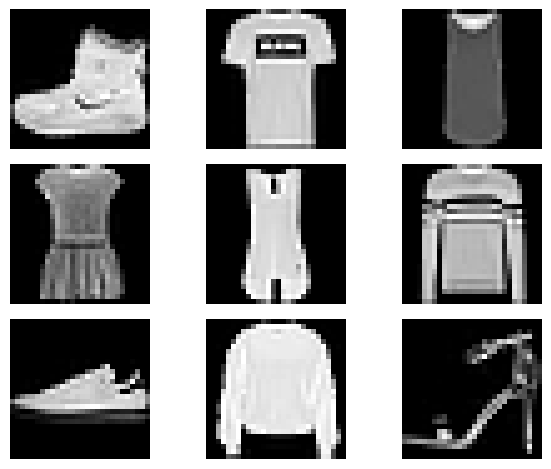

In [22]:
# Assuming X_train is a dataset with image data
import matplotlib.pyplot as plt

# Iterate over the first 9 images
for i in range(9):  # Changed (9) to range(9)
    plt.subplot(330 + 1 + i)  # Correct usage of subplot
    # Plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))  # Display the ith image
    plt.axis('off')  # Hide axes for better visualization
# Show all plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [23]:
# X_train = X_train / 255.0
# y_train = y_test / 255.0

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model and transform it 
model.fit(X_train, y_train, epochs=10)

# evaluate the model
test_loss , test_acc = model.evaluate(X_test,y_test)

# print the accuracy 
print('model Accuracy : ',test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6854 - loss: 11.9027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7661 - loss: 0.6769
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8003 - loss: 0.5675
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8078 - loss: 0.5544
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8158 - loss: 0.5255
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8359 - loss: 0.4779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8356 - loss: 0.4738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8349 - loss: 0.4804
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8433 - loss: 0.4556
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8474 - loss: 0.4556
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - loss: 0.4813
model Accuracy :  0.8453999757766724


In [26]:
# prediction
predictions = model.predict(X_test)

# print the shape of the array prediction 
print(predictions[:10])

#convert the prediction into class labels
class_lable = [tf.argmax(prediction) for prediction in predictions]


# print the first 10 class labels
print(class_lable[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[2.6102261e-26 8.7137033e-25 0.0000000e+00 4.2399150e-28 0.0000000e+00
  5.0582677e-02 1.1331074e-27 2.1936348e-02 1.4514288e-13 9.2748106e-01]
 [6.2010478e-04 3.1207016e-11 9.9484622e-01 1.8367832e-06 3.6858912e-03
  7.4636660e-21 8.4597402e-04 0.0000000e+00 9.3560985e-08 0.0000000e+00]
 [4.0497574e-11 9.9999988e-01 1.5587531e-14 9.9748465e-10 1.5044688e-07
  5.3369445e-28 8.7396802e-22 0.0000000e+00 8.7242046e-19 0.0000000e+00]
 [1.4752122e-09 9.9996281e-01 4.4101315e-12 7.5117845e-07 3.6534493e-05
  2.5604679e-31 5.2960098e-18 0.0000000e+00 3.1887058e-16 0.0000000e+00]
 [5.4731466e-02 5.3991266e-03 2.0671952e-01 1.0309627e-01 1.0140474e-01
  3.7843897e-06 4.9529037e-01 7.5433590e-14 3.3354703e-02 2.2606620e-11]
 [1.3616218e-06 9.9999428e-01 1.3929416e-10 1.3551860e-06 3.1012942e-06
  5.0508756e-24 7.9562169e-15 0.0000000e+00 2.5977797e-14 0.0000000e+00]
 [3.3037964e-04 7.9544924e-07 1.5997547e-01 1.7158207e-02 5.8333397e-01
  2.3836534e-25 2